In [59]:
from tools import tsplot, tsdiag, cusumRepeat, simArima
from statsmodels.tsa.arima_model import ARIMA, ARMA
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
%matplotlib inline

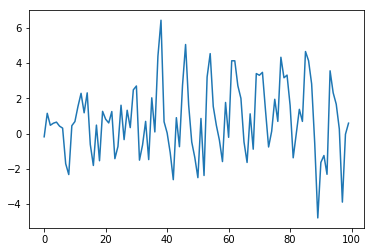

In [60]:
nSample = 100
ar = np.array([ +0.547, 0, 0, 0, 0, 0, 0, +0.86, -0.86*0.547]) # Auto Regresive parameters
ma = np.array([])    # Moving Average parameters

arroots = np.polynomial.Polynomial(np.r_[1, ar]).roots()
maroots = np.polynomial.Polynomial(np.r_[1, ma]).roots()

dParam = 0          # Integrated parameter
sim1 = simArima(ar = ar, d = dParam, ma = ma, n = nSample)
plt.plot(sim1)

# Predictions, std and  5-95th conf interval

In [66]:
model = ARIMA(sim1, order = (9,0,0)).fit(method='mle', trend='nc')
# model = ARIMA(sim1, order = (9,0,0))
model.params = np.array([ +0.547, 0, 0, 0, 0, 0, 0, +0.86, -0.86*0.547])
print('Coefficients: ' + str( model.params))
model.forecast(4)

Coefficients: [ 0.547    0.       0.       0.       0.       0.       0.       0.86
 -0.47042]


(array([-0.69961187,  3.87636183,  2.00340794,  2.04702835]),
 array([0.93311486, 1.08865015, 1.15405037, 1.16820345]),
 array([[-2.52848339,  1.12925965],
        [ 1.74264675,  6.01007692],
        [-0.25848921,  4.2653051 ],
        [-0.24260834,  4.33666505]]))

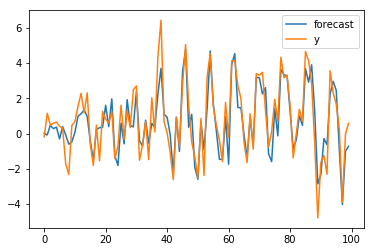

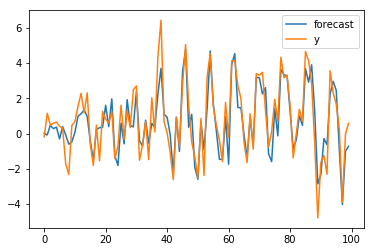

In [65]:
model.plot_predict()

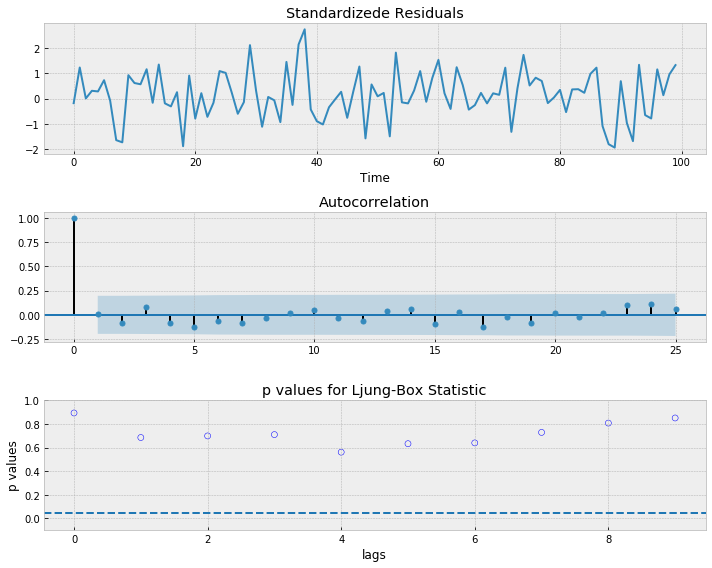

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                     ARMA(9, 0)   Log Likelihood                -140.332
Method:                           mle   S.D. of innovations              0.933
Date:                Fri, 29 Mar 2019   AIC                            300.664
Time:                        12:47:22   BIC                            326.715
Sample:                             0   HQIC                           311.207
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.y        0.6010      0.087      6.868      0.000       0.429       0.772
ar.L2.y        0.0493      0.057      0.859      0.392      -0.063       0.162
ar.L3.y       -0.0820      0.059     -1.390      0.168      -0.198       0.034
ar.L4.y       -0.0649      0.054     -1.193      0.236      -0.171       0.042
ar.L5.y        0.0970      0.057      1.698      0.093      -0.015       0.209
ar.L6.y       -0.1044      0.058     -1.802      0.075      -0.218       0.009
ar.L7.y        0.0086      0.059      0.147      0.883      -0.106       0.124
ar.L8.y        0.8368      0.056     15.036      0.000       0.728       0.946
ar.L9.y       -0.5037      0.089     -5.680      0.000      -0.678      -0.330
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.0365           -0.0000j            1.0365           -0.5000
AR.2           -0.7294           -0.6964j            1.0085           -0.3787
AR.3           -0.7294           +0.6964j            1.0085            0.3787
AR.4            0.0168           -1.0329j            1.0330           -0.2474
AR.5            0.0168           +1.0329j            1.0330            0.2474
AR.6            0.7258           -0.7109j            1.0160           -0.1233
AR.7            0.7258           +0.7109j            1.0160            0.1233
AR.8            1.0634           -0.0000j            1.0634           -0.0000
AR.9            1.6077           -0.0000j            1.6077           -0.0000
-----------------------------------------------------------------------------
"""

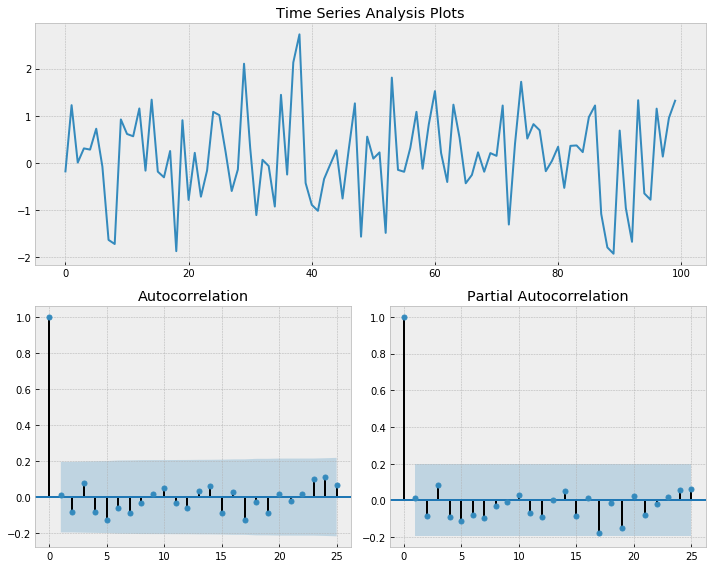

In [69]:
tsdiag(model.resid)
plt.show()
tsplot(model.resid)

model.summary(alpha=0.05)